# Linear regression with sklearn

In [11]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [12]:
# Define columns for import
columns = [ 'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'tax_income']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv", sep=",", encoding='utf-8')[columns]

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

print(df.shape)
df.head(5)

(732, 12)


,rooms,area,luxurious,price,price_per_m2,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,tax_income
0,3.5,122,0,3180,26.07,112,Bubikon,7344,632.558140,11.410675,3617.0,82162
1,4.0,87,0,1690,19.43,112,Bubikon,7344,632.558140,11.410675,3617.0,82162
2,2.5,78,0,3760,48.21,261,Zürich,420217,4778.994655,32.458468,491193.0,85446
4,2.5,59,0,2920,49.49,261,Zürich,420217,4778.994655,32.458468,491193.0,85446
5,3.0,75,0,3003,40.04,261,Zürich,420217,4778.994655,32.458468,491193.0,85446


### Create train and test samples (train = 80%, test = 20% of the data) with a single 

In [13]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['area']], 
                                                    df['price'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
     area
712    75
266    64
355    78
276    70
459    76 

y_train:
712    1790
266    1320
355    1760
276    1595
459    1495
Name: price, dtype: int64


In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_predict = lin_reg.predict(X_train)

y_predict = lin_reg.predict(X_test)

y_residuals = y_predict - y_test

print('')

print('train mean_squared_error {}'.format(mean_squared_error(y_train, y_train_predict)))
print('train root_mean_squared_error {}'.format(np.sqrt(mean_squared_error(y_train, y_train_predict))))

print('')

print("test mean_squared_error ", mean_squared_error(y_test, y_predict))
print("test root_mean_squared_error ", np.sqrt(mean_squared_error(y_test, y_predict)))


train mean_squared_error 358757.69169991656
train root_mean_squared_error 598.9638484081628

test mean_squared_error  421158.3613064493
test root_mean_squared_error  648.9671496358266


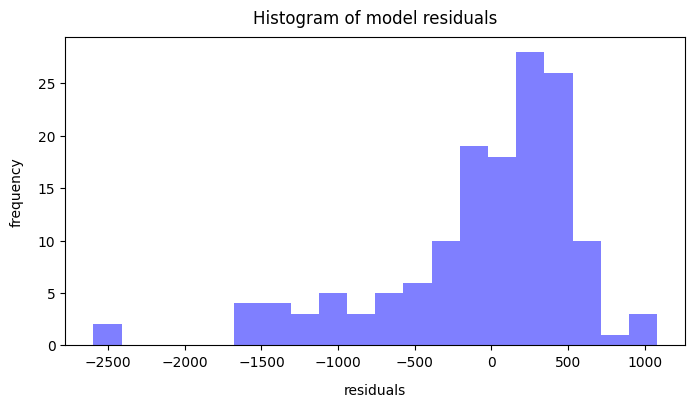

In [15]:
# y_hat are the predicted results.

# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=y_residuals, 
                            bins=20, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.show()

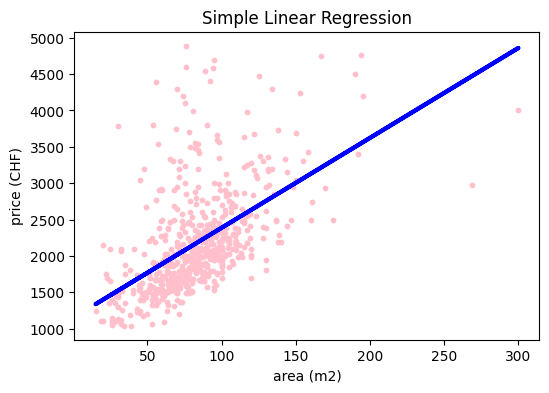

In [16]:
# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='pink')
plt.plot(X_train, y_train_predict, color="blue", linewidth=3)
plt.title('Simple Linear Regression')
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')

plt.show()

### Create train and test samples (train = 80%, test = 20% of the data) with multiple values 

In [17]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X_train, X_test, y_train, y_test = train_test_split(df[['area',
                                                        'pop_dens', 
                                                        'tax_income']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
     area     pop_dens  tax_income
712    75   451.920694       79356
266    64  1662.597326       70966
355    78  1221.272366       66676
276    70  1662.597326       70966
459    76   684.794087       80449 

y_train:
712    1790
266    1320
355    1760
276    1595
459    1495
Name: price, dtype: int64


In [18]:
# use linear regression to fit (train) and then predict the results.
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_predict = lin_reg.predict(X_train)

y_predict = lin_reg.predict(X_test)

y_residuals = y_predict - y_test

print('train mean_squared_error {}'.format(mean_squared_error(y_train, y_train_predict)))
print('train root_mean_squared_error {}'.format(np.sqrt(mean_squared_error(y_train, y_train_predict))))

print('')

print("test mean_squared_error ", mean_squared_error(y_test, y_predict))
print("test root_mean_squared_error ", np.sqrt(mean_squared_error(y_test, y_predict)))

train mean_squared_error 214364.68329001506
train root_mean_squared_error 462.9953383026821

test mean_squared_error  252143.99232557914
test root_mean_squared_error  502.13941522806107


### Plot histogram of residuals

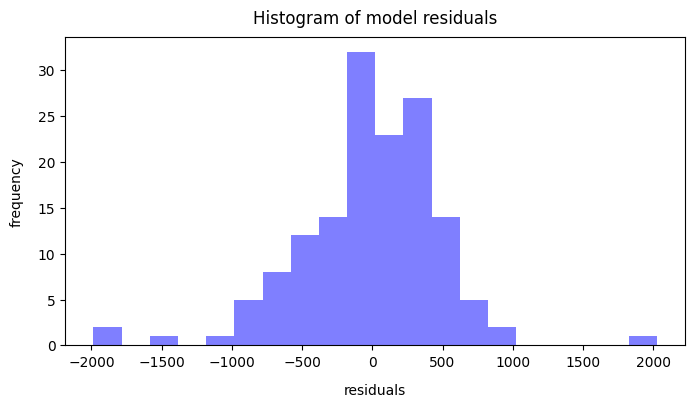

In [19]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=y_residuals, 
                            bins=20, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.show()

In [20]:
import pickle

# save model to file
model_filename = "bauerfel_linear_regression.pkl"
with open(model_filename, mode="bw") as f:
    pickle.dump(lin_reg, file=f)